<a href="https://colab.research.google.com/github/Kamal-Moha/Food-Sales-Predictions/blob/main/Prediction_Final_Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
filename = '/content/drive/MyDrive/CODING DOJO DS BOOTCAMP/PROJECTS/Project 1 - Sales Predictions/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Before moving forward, we have to get rid of some columns that won't help us in predicting sales. 
I personally think the following columns don't influence sales predictions;


1.   Outlet_Establishment_Year
1.   Item_Identifier
2.   Outlet_Identifier


Therefore, I'm going to first drop those 3 columns before doing any other thing.

In [3]:
# dropping the 3 unnecessary columns 
df = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


OK cool, Now we are gonna have to Ordinal code and OneHotEncode some columns to get our dataframe in our desired format

In [4]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [5]:
# We can see Outlet_Size has Ordinal values that we can represent as numbers
replace_dict = {'Small':0, 'Medium':1, 'High':2}
df['Outlet_Size'].replace(replace_dict, inplace=True)

In [6]:
# Separating our columns by dtype
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [7]:
# Instantiate transformers
# median simpleImputer
median_imputer = SimpleImputer(strategy='median')

# OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [8]:
# Making tuples for column transfomation
num_tuple = (median_imputer, num_selector)
cat_tuple = (ohe, cat_selector)

In [9]:
# Creating col_transformer
ct = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')


In [13]:
transformed_names = ct.get_feature_names_out()
actual_names = [i.split('__')[-1] for i in transformed_names]

# creating a new transformer df
new_df = pd.DataFrame(ct.fit_transform(df), columns=actual_names)
new_df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1.0,3735.1380,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.019278,48.2692,1.0,443.4228,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.50,0.016760,141.6180,1.0,2097.2700,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,0.000000,182.0950,1.0,732.3800,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.93,0.000000,53.8614,2.0,994.7052,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Now we can move forward to make predictions using different models

**Exploring our new dataframe**

In [19]:
# checking for duplicates
new_df.duplicated().sum()

0

In [20]:
# checking for missing values
new_df.isna().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Size                        0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Location_Type_Tier 1        0
O

**Validation split**

In [15]:
# creating a target vector & a matrix feature
y = new_df['Item_Outlet_Sales']
X = new_df.drop(columns='Item_Outlet_Sales')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# **Linear Regression Model**

**Instantiate and fit the Model**

In [21]:
# instantiate the models
scaler = StandardScaler()
lin_reg = LinearRegression()

# create a pipeline
lin_reg_pipe = make_pipeline(scaler, lin_reg)

# fit the model using training data
lin_reg_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

**Create Model Predictions for Training and Testing Data**

In [22]:
# Create model predictions
train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)

**Evaluate the Model using Regression Metrics**

In [32]:
# Calculating the R2 score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
print(train_r2)
print(test_r2)

0.5606877051548549
0.5656972162428142


From our R2 score, our model explains 56.07% of the variance in the training set and explains 56.57% of variance in the test set.

In [33]:
# Calculating the RMSE of our model

# Finding the MSE first
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

# Now calculating the RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print(train_rmse)
print(test_rmse)

1140.2303613955025
1094.637618765809


From our RMSE, it shows that we have an average error of 1140.23 in the training set and and average error of 1094.64 in the testing set.

The RMSE values are relatively high, suggesting that the model's predictions are not very accurate.

# **Regression Tree Model**

**Instantiate the Tree Model**

In [35]:
dec_tree = DecisionTreeRegressor(random_state=42)

**Fit the Model using the training data**

In [36]:
# fit the model
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

**Predict the target values for the training and testing set**

In [37]:
# making predictions for both the train & test data
train_tree_preds = dec_tree.predict(X_train)
test_tree_preds = dec_tree.predict(X_test)

**Evaluate the Model**

In [39]:
# Evaluating our model by getting the R2 score
train_tree_score = dec_tree.score(X_train, y_train)
test_tree_score = dec_tree.score(X_test, y_test)

print(train_tree_score)
print(test_tree_score)

1.0
0.1282199664431266


It should be clear that the default decision tree had a much higher R^2 score on the training data than it did on the test data.  This is an indication that the model is overfitting.  

**Tune the Model**

In [40]:
# Looking at option for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [42]:
# How leaf nodes
dec_tree.get_n_leaves()

6259

In [41]:
# What is the depth of our default tree
dec_tree.get_depth()

41

**Finding the optimal max_depth (hyperparameter tuning)**

`max_depth` is  a parameter of the Decision Tree Model. Finding the best `max_depth` will improve the performance of our model, so we are going to do that.

As you saw from the above cell, our tree 41 levels deep. But manually filling that for `max_depth` will take much time & effort. So we are going to be smart about it and use a for loop.

In [47]:
max_depth_range = list(range(1, dec_tree.get_depth()))

r2 = []
for depth in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state=42)
  dec_tree.fit(X_train, y_train)
  score = dec_tree.score(X_test, y_test)
  r2.append(score)


To help us see the results of trying various tree depths, the following code creates a visualization of R2 vs max_depth.

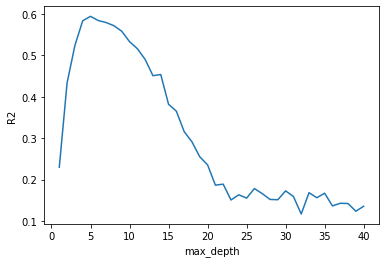

In [45]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

From the image above, it looks like the best score for the model is when the parameter max_depth is 5.  

In [57]:
# Let's run the model with our optimized value for max_depth

# creating a model with the best max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state=42)
dec_tree_5.fit(X_train, y_train)

# making predictions using model with the best max_depth
dec_tree_5_test_preds = dec_tree_5.predict(X_test)

# R2 scores of our best model
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.6039251094395393
0.5947194175939473


As you can see above, having `max_depth` of 5 massively improved the r2 test score of our model which is a good thing

From our R2 score, our model explains 60.4% of the variance in the training set and explains 59.5% of variance in the test set. 

This is an improvement from our previous model

In [61]:
# Calculating the RMSE of our tree model

# calculate model mse
dec_tree_mse = mean_squared_error(y_test, dec_tree_5_test_preds)

# Now calculating the RMSE
dec_tree_rmse = np.sqrt(dec_tree_mse)
print(dec_tree_rmse)

1057.4308119434352


From our RMSE, it shows we have an average error of 27.1 in our testing set.

This is a **very big** improvement from the previous model.

## **Model Recommendation. Which Model is Best?**

**The Regression Tree Model is Better**

Its very clear that the Regression/Decision tree model is much better than the Linear Regression model as it the regression tree outperforms in both R^2 and RMSE metrics 

In [63]:
# Finding the mae of the Regression model
reg_mae = mean_absolute_error(y_test, test_pred)
print(reg_mae)

805.4413140610877


In [60]:
# Finding the mae of the tree model
dec_tree_mae = mean_absolute_error(y_test, dec_tree_5_test_preds)
print(dec_tree_mae)

738.1985550019423


We can again see the Regression tree model has a much lower Mean Absolute Error(MAE).

This clearly indicates the Regression tree model is the better model for this data